In [1]:
import pandas as pd
import numpy as np
googleplaystore = pd.read_csv("./data/processed_googleplaystore_balanced.csv")

In [2]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Just She - Top Lesbian Dating,6,1.9,953,19.0,100000,0,0.0,2,12,2018-07-18,6,5.00
1,Just She - Top Lesbian Dating,6,1.9,953,19.0,100000,0,0.0,2,12,2018-07-18,6,5.00
2,House party - live chat,6,1.0,1,9.2,10,0,0.0,2,12,2018-07-31,3,4.03
3,Just She - Top Lesbian Dating,6,1.9,954,19.0,100000,0,0.0,2,12,2018-07-18,6,5.00
4,C by GE,17,1.7,686,6.6,10000,0,0.0,0,22,2018-07-11,4,4.30


In [3]:
cols = googleplaystore.columns
cols

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Input features
## Modify some of number the input features

In [4]:
feature_cols = ['Type','Content Rating', 'Category','Genres','Reviews','Size','Installs','Price', 'Android Ver']
X = googleplaystore[feature_cols]# Features
y = googleplaystore.Rating # Target variable
y = y.astype(int)

In [5]:
X.head()

,Type,Content Rating,Category,Genres,Reviews,Size,Installs,Price,Android Ver
0,0,2,6,12,953,19.0,100000,0.0,5.00
1,0,2,6,12,953,19.0,100000,0.0,5.00
2,0,2,6,12,1,9.2,10,0.0,4.03
3,0,2,6,12,954,19.0,100000,0.0,5.00
4,0,0,17,22,686,6.6,10000,0.0,4.30


X = googleplaystore.drop(['Rating'],axis =1)# Features
y = googleplaystore.Rating # Target variable

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Models

In [7]:
from sklearn.linear_model import LogisticRegression,LinearRegression

# instantiate the model (using the default parameters)
lreg = LogisticRegression()

# fit the model with data
lreg.fit(X_train,y_train)

#
y_pred_log=lreg.predict(X_test)

In [8]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_smv = clf.predict(X_test)

In [9]:
from sklearn import tree
clf_decision = tree.DecisionTreeClassifier()

clf_decision.fit(X_train, y_train)

y_pred_dec = clf_decision.predict(X_test)

In [10]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfgnb=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfgnb.fit(X_train,y_train)

y_pred_gnb=clfgnb.predict(X_test)

## Accuracy

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log))
print(accuracy_score(y_test,y_pred_smv))
print(accuracy_score(y_test,y_pred_dec))
print(accuracy_score(y_test,y_pred_gnb))

0.4357142857142857
0.4357142857142857
0.4714285714285714
0.5214285714285715


## Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

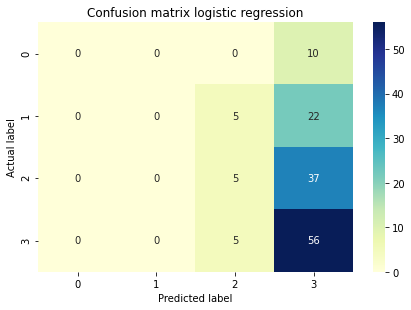

In [13]:
cnf_matrixlogreg = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cnf_matrixlogreg, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

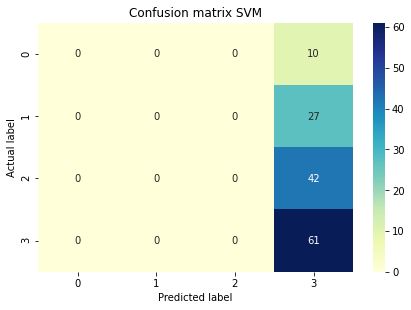

In [14]:
cnf_matrixsvm = confusion_matrix(y_test, y_pred_smv)

sns.heatmap(cnf_matrixsvm, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

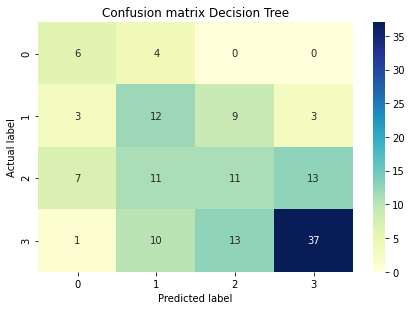

In [15]:
cnf_matrixdec = confusion_matrix(y_test, y_pred_dec)

sns.heatmap(cnf_matrixdec, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

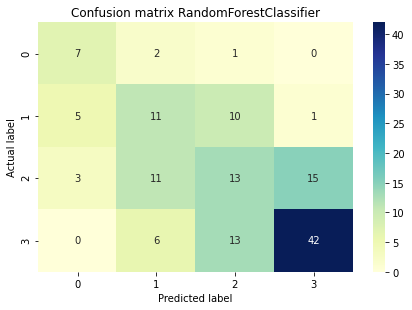

In [16]:
cnf_matrixgnb = confusion_matrix(y_test, y_pred_gnb)

sns.heatmap(cnf_matrixgnb, annot=True, cmap="YlGnBu" ,fmt='d')
plt.tight_layout()
plt.title('Confusion matrix RandomForestClassifier')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "./flask/pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(clfgnb, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 52.14 %
